<html><h2><b>Sales Prediction by Pricipal Component Analyse and Recursive Partioning Regression Tree Method</b></h2></html>

In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
#Loading data.
train=pd.read_csv("D:\DataAnalytics\Train.csv")
test=pd.read_csv("D:\DataAnalytics\Test.csv")

In [3]:
print("Rows and Columns in training set:", train.shape)
print("Rows and Columns in training set:", test.shape)


Rows and Columns in training set: (8523, 12)
Rows and Columns in training set: (5681, 11)


In [4]:
#getting familiar with the structure of dataset.
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [6]:
#Finding missing values in the dataset.
for col in train:
    val=train[col].isnull().sum()
    if val>0.0:
        print("Number of missing values in column ",col,":",val)

Number of missing values in column  Item_Weight : 1463
Number of missing values in column  Outlet_Size : 2410


In [7]:
for col in test:
    val=train[col].isnull().sum()
    if val>0.0:
        print("Number of missing values in column ",col,":",val)

Number of missing values in column  Item_Weight : 1463
Number of missing values in column  Outlet_Size : 2410


In [8]:
#informatin about the dataset
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


<html><h3>find that there are 7 categorical features: Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type, Outlet_Type .
    Let's use mapping to convert them into numerical data.</h3></html>

In [10]:
print(train["Item_Fat_Content"].value_counts())
print(train["Item_Type"].value_counts())
print(train["Outlet_Identifier"].value_counts())
print(train["Outlet_Size"].value_counts())
print(train["Outlet_Location_Type"].value_counts())
print(train["Outlet_Type"].value_counts())

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
Supermarket Type1    5577
Grocer

In [11]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [13]:
combine=[test, train]
content_mapping = {'Low Fat':1, 'Regular':2, 'LF':3, 'reg':4, 'low fat':5}
item_mapping = {'Fruits and Vegetables': 1, 'Snack Foods': 2, 'Household': 3, 'Frozen Foods': 4, 'Dairy': 5, 'Canned':6, 'Baking Goods':7, 'Health and Hygiene':8, 'Soft Drinks':9, 'Meat':10, 'Breads':11, 'Hard Drinks':12, 'Others':13, 'Starchy Foods':14, 'Breakfast':15, 'Seafood':16}
outletIdentifier_mapping ={'OUT027': 27, 'OUT013': 13, 'OUT046': 46, 'OUT035': 35, 'OUT049': 49, 'OUT045':45, 'OUT018':18, 'OUT017':17, 'OUT010':10, 'OUT019':19}
outlet_mapping = {'High': 1, 'Medium': 2, 'Small': 3}
Location_mapping = {'Tier 1': 1, 'Tier 2': 2, 'Tier 3': 3}
Type_mapping = {'Supermarket Type1': 1, 'Supermarket Type2': 2, 'Supermarket Type3': 3, 'Grocery Store':4}
for dataset in combine:
    dataset['Item_Fat_Content'] = dataset['Item_Fat_Content'].map(content_mapping)
    dataset['Item_Fat_Content'] = dataset['Item_Fat_Content'].fillna(0)
    dataset['Item_Type'] = dataset['Item_Type'].map(item_mapping)
    dataset['Item_Type'] = dataset['Item_Type'].fillna(0)
    dataset['Outlet_Size'] = dataset['Outlet_Size'].map(outlet_mapping)
    dataset['Outlet_Size'] = dataset['Outlet_Size'].fillna(0) 
    dataset['Outlet_Identifier'] = dataset['Outlet_Identifier'].map(outletIdentifier_mapping)
    dataset['Outlet_Identifier'] = dataset['Outlet_Identifier'].fillna(0)
    dataset['Outlet_Location_Type'] = dataset['Outlet_Location_Type'].map(Location_mapping)
    dataset['Outlet_Location_Type'] = dataset['Outlet_Location_Type'].fillna(0)
    dataset['Outlet_Type'] = dataset['Outlet_Type'].map(Type_mapping)
    dataset['Outlet_Type'] = dataset['Outlet_Type'].fillna(0)

train.head()
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,1,0.007565,2,107.8622,49,1999,2.0,1,1
1,FDW14,8.300,4,0.038428,5,87.3198,17,2007,0.0,2,1
2,NCN55,14.600,1,0.099575,13,241.7538,10,1998,0.0,3,4
3,FDQ58,7.315,1,0.015388,2,155.0340,17,2007,0.0,2,1
4,FDY38,NaN,2,0.118599,5,234.2300,27,1985,2.0,3,3


<html><h3>Through mapping, we have converted all except Item_Identifier into numeric data.
Let's use cat.codes accessor to convert Item_Identifier into numeric data. But cat.codes works only on category datatype, so we'll first convert Item_Identifier into a category type and
then use cat.codes to convert the last categorical feature to numeric.</h3></html>

In [14]:
train["Item_Identifier"] = train["Item_Identifier"].astype('category')
train.dtypes


Item_Identifier              category
Item_Weight                   float64
Item_Fat_Content                int64
Item_Visibility               float64
Item_Type                       int64
Item_MRP                      float64
Outlet_Identifier               int64
Outlet_Establishment_Year       int64
Outlet_Size                   float64
Outlet_Location_Type            int64
Outlet_Type                     int64
Item_Outlet_Sales             float64
dtype: object

In [15]:
#converting categorical data to numeric.
train["Item_Identifier"] = train["Item_Identifier"].cat.codes
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,5,249.8092,49,1999,2.0,1,1,3735.1380
1,8,5.92,2,0.019278,9,48.2692,18,2009,2.0,3,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,49,1999,2.0,1,1,2097.2700
3,1121,19.20,2,0.000000,1,182.0950,10,1998,0.0,3,4,732.3800
4,1297,8.93,1,0.000000,3,53.8614,13,1987,1.0,3,1,994.7052


In [16]:
test["Item_Identifier"] = test["Item_Identifier"].astype('category')
test.dtypes

Item_Identifier              category
Item_Weight                   float64
Item_Fat_Content                int64
Item_Visibility               float64
Item_Type                       int64
Item_MRP                      float64
Outlet_Identifier               int64
Outlet_Establishment_Year       int64
Outlet_Size                   float64
Outlet_Location_Type            int64
Outlet_Type                     int64
dtype: object

In [17]:
#converting categorical data to numeric.
test["Item_Identifier"] = test["Item_Identifier"].cat.codes
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750,1,0.007565,2,107.8622,49,1999,2.0,1,1
1,1067,8.300,4,0.038428,5,87.3198,17,2007,0.0,2,1
2,1406,14.600,1,0.099575,13,241.7538,10,1998,0.0,3,4
3,809,7.315,1,0.015388,2,155.0340,17,2007,0.0,2,1
4,1184,NaN,2,0.118599,5,234.2300,27,1985,2.0,3,3


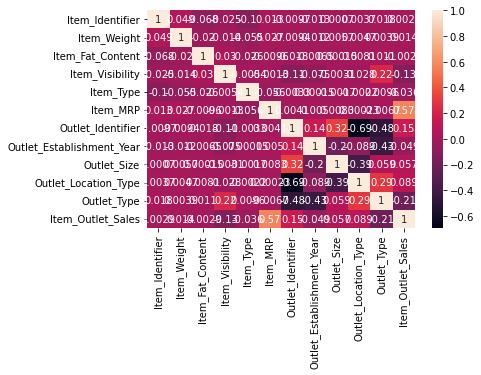

In [18]:
#Overall Correlation
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(train.corr(),annot=True)
plt.show()

In [19]:
pd.crosstab(train['Outlet_Size'], train['Outlet_Identifier'])


Outlet_Identifier,10,13,17,18,19,27,35,45,46,49
Outlet_Size,,,,,,,,,,
0.0,555,0,926,0,0,0,0,929,0,0
1.0,0,932,0,0,0,0,0,0,0,0
2.0,0,0,0,928,0,935,0,0,0,930
3.0,0,0,0,0,528,0,930,0,930,0


<html><h3>From above,if table,
we can safely conclude that, outlet_identifier=10,17,45,
outlet_size=0 if 13 1 if 18,27,49 2 if 19,35,46 3 so, we fill the missing values acordingly</h3></html>

In [20]:
for row in train.itertuples(index=True, name='Pandas'):
    if row[9] is None:
        if(row[7]==10 or row[7]==17 or row[7]==45):
            train.loc[row.Index, 'Outlet_Size'] = 0
    else:
        if(row[7]==13):
            train.loc[row.Index, 'Outlet_Size'] =1
        else:
            if(row[7]==18 or row[7]==27 or row[7]==49):
                train.loc[row.Index, 'Outlet_Size'] =2
            else:
                if(row[7]==19 or row[7]==35 or row[7]==46):
                    train.loc[row.Index, 'Outlet_Size'] =3

In [21]:
for row in test.itertuples(index=True, name='Pandas'):
    if row[9] is None:
        if(row[7]==10 or row[7]==17 or row[7]==45):
            test.loc[row.Index, 'Outlet_Size'] = 0
    else:
        if(row[7]==13):
            test.loc[row.Index, 'Outlet_Size'] =1
        else:
            if(row[7]==18 or row[7]==27 or row[7]==49):
                test.loc[row.Index, 'Outlet_Size'] =2
            else:
                if(row[7]==19 or row[7]==35 or row[7]==46):
                    test.loc[row.Index, 'Outlet_Size'] =3

In [22]:
train['Item_Weight'].fillna(train['Item_Weight'].dropna().median(), inplace=True)


In [23]:
test['Item_Weight'].fillna(test['Item_Weight'].dropna().median(), inplace=True)


In [24]:
import sklearn.preprocessing as preprocess
X_train = preprocess.scale(train)
X_test = preprocess.scale(test)

<html><h2> PCA </h2></html>

<html><h3>Let's find the mean of each feature which are actually the dimensions of the dataset.</h3></html>

In [25]:
mean_Identifier = train["Item_Identifier"].mean()
mean_Weight = train["Item_Weight"].mean()
mean_Fat_Content = train["Item_Fat_Content"].mean()
mean_Visibility = train["Item_Visibility"].mean()
mean_Type = train["Item_Type"].mean()
mean_MRP = train["Item_MRP"].mean()
mean_OIdentifier = train["Outlet_Identifier"].mean()
mean_Year = train["Outlet_Establishment_Year"].mean()
mean_Size = train["Outlet_Size"].mean()
mean_Location = train["Outlet_Location_Type"].mean()
mean_Type = train["Item_Type"].mean()

print(mean_Identifier)
print(mean_Weight)
print(mean_Fat_Content)
print(mean_Visibility)
print(mean_Type)
print(mean_MRP)
print(mean_OIdentifier)
print(mean_Year)
print(mean_Size)
print(mean_Location)
print(mean_Type)

779.714889123548
12.813419570574444
1.5068637803590286
0.06613202877895127
5.433884782353632
140.9927819781768
29.108764519535374
1997.8318667135984
1.6053032969611638
2.1128710547929135
5.433884782353632


In [27]:
mean_vector = np.array([[mean_Identifier,mean_Weight,mean_Fat_Content,mean_Visibility,mean_Type,mean_MRP,mean_OIdentifier,mean_Year,mean_Size,mean_Location,mean_Type]])
print('Mean Vector:\n', mean_vector)
mean_vector.shape


Mean Vector:
 [[7.79714889e+02 1.28134196e+01 1.50686378e+00 6.61320288e-02
  5.43388478e+00 1.40992782e+02 2.91087645e+01 1.99783187e+03
  1.60530330e+00 2.11287105e+00 5.43388478e+00]]


(1, 11)

In [28]:
X_train=np.array(train.drop("Item_Outlet_Sales", axis=1))


In [29]:
scatter_matrix = np.zeros((11,11))
for i in range(X_train.shape[0]):
    scatter_matrix += ((X_train[i,:].reshape(1,11) - mean_vector).T).dot(X_train[i,:].reshape(1,11)- mean_vector)
    #print(i)
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[ 1.71974594e+09  7.15576570e+05 -1.96104321e+05 -5.03350661e+03
  -1.50783366e+06  3.06422107e+06 -5.17498702e+05 -4.09327564e+05
   3.14788701e+03  1.13752767e+04  7.68920655e+04]
 [ 7.15576570e+05  1.52284403e+05 -4.98497545e+02 -2.63344580e+01
  -6.73072557e+03  5.59748550e+04 -2.72013994e+03  2.33400024e+03
  -5.94365646e+01  5.73353731e+01 -5.15483143e+02]
 [-1.96104321e+05 -4.98497545e+02  4.80834847e+03  9.93551199e+00
  -6.26382260e+02 -3.82851015e+03 -1.57586272e+03 -3.45664203e+02
   1.08975713e+00  4.23970433e+01  7.69947202e+01]
 [-5.03350661e+03 -2.63344580e+01  9.93551199e+00  2.26884212e+01
  -8.84465585e+00 -3.60049875e+01 -6.84614937e+02 -2.75477273e+02
  -1.59644091e+00 -1.00421733e+01  1.07028224e+02]
 [-1.50783366e+06 -6.73072557e+03 -6.26382260e+02 -8.84465585e+00
   1.20139494e+05 -1.10845260e+05 -1.47121119e+03  4.07568931e+01
  -6.34115922e+01 -5.73971606e+01  3.36298721e+02]
 [ 3.06422107e+06  5.59748550e+04 -3.82851015e+03 -3.60049875e+01
  

In [30]:
#Computing eigenvectors and corresponding eigenvalues.
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

print("Eigen Values:\n",eig_val_sc)
print("Eigen Vectors:\n",eig_vec_sc)

Eigen Values:
 [1.71975340e+09 3.30448112e+07 1.67784076e+06 5.81136308e+05
 1.52904030e+05 1.17439287e+05 1.24139389e+05 9.88820542e+03
 4.77649612e+03 2.17599967e+01 2.69248553e+03]
Eigen Vectors:
 [[-9.99997797e-01  1.81984854e-03 -3.32446006e-04  1.96825534e-04
  -5.55590410e-04 -7.88177807e-04  3.26709789e-06  1.81490791e-06
   1.19290426e-04  3.06410084e-06 -6.58815702e-06]
 [-4.16191219e-04 -1.66278751e-03  1.43229938e-03  6.53912241e-03
   9.85312099e-01 -1.68944354e-01 -2.36602867e-02  7.59332627e-04
   3.10186126e-03  1.62419550e-04 -3.00430777e-04]
 [ 1.14034076e-04  1.05090286e-04  9.97407719e-04 -3.11310237e-04
  -1.81365224e-03  7.71728741e-03  2.44989126e-04 -8.11228319e-03
   9.99904177e-01 -1.71121127e-03 -7.67324775e-03]
 [ 2.92675032e-06  8.39721609e-07  4.28496943e-04 -3.27030163e-04
  -1.46704218e-04  1.73133013e-04 -5.27334382e-04 -1.54770371e-03
   1.79771727e-03  9.99910167e-01  1.31685412e-02]
 [ 8.76950935e-04  3.28364142e-03  1.17808231e-03 -1.28404136e-04
  

In [31]:
for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(11,1).T
    
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print(40 * '-')

Eigenvector 1: 
[[-9.99997797e-01 -4.16191219e-04  1.14034076e-04  2.92675032e-06
   8.76950935e-04 -1.81675126e-03  3.01192710e-04  2.38098838e-04
  -1.83033559e-06 -6.62709842e-06 -4.47255053e-05]]
Eigenvalue 1 from scatter matrix: 1719753403.4620564
----------------------------------------
Eigenvector 2: 
[[ 1.81984854e-03 -1.66278751e-03  1.05090286e-04  8.39721609e-07
   3.28364142e-03 -9.99990799e-01 -9.89978680e-04 -7.14769650e-04
  -1.56989274e-04 -2.77712252e-07  1.24134993e-04]]
Eigenvalue 2 from scatter matrix: 33044811.210930184
----------------------------------------
Eigenvector 3: 
[[-3.32446006e-04  1.43229938e-03  9.97407719e-04  4.28496943e-04
   1.17808231e-03  1.08254876e-03 -9.89504011e-01 -1.29694924e-01
  -2.54701433e-02  4.00122545e-02  4.24903481e-02]]
Eigenvalue 3 from scatter matrix: 1677840.7552049293
----------------------------------------
Eigenvector 4: 
[[ 1.96825534e-04  6.53912241e-03 -3.11310237e-04 -3.27030163e-04
  -1.28404136e-04 -5.89204065e-04 -1

In [32]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
   print(i[0])


1719753403.4620564
33044811.210930184
1677840.7552049293
581136.3076258238
152904.0302259884
124139.38918949636
117439.287277023
9888.205422036453
4776.49612082428
2692.4855261865346
21.75999668023792


<html><h3> Thus using PCA algorithm,reduce the dimensionality from 11 to 7.
We can reject the last 4 dimensions The features we drop are Outlet_Establishment_Year, Outlet_Size, Outlet_Location, Outlet_type.
The features we take into account are Item_Identifier, Item_Weight, ITem_Fat_Content, ITem_Visibilty, Item_Type, Outlet_Identifier, Item_MRP.</h3></html>